<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/lec13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
t = c(123, 704, 184, 113,  94,  76,  78,  98, 240,
 110, 213, 284, 317, 142, 127,  96, 111)
x = c(2.74, 5.47, 2.13, 1.00, 0.32, 0.31, 0.51,
0.29, 0.96, 0.60, 2.10, 3.10, 5.86, 1.18, 0.57,
1.10, 1.89)
d = data.frame(t, load = x)

In [5]:
loglikelihood = function(x, t, delta){
  function(par){ sum(log(f(x, t, delta, par))) }
}
f = function(x, t, delta, par){
  mu = par[1]+par[2]*x
  sigma = par[3]
  (dnorm((log(t)-mu)/sigma)/(sigma*t))^delta * (1-pnorm((log(t)-mu)/sigma))^(1-delta)
}
t = d$t
x = d$load
delta = rep(1, length(t))
res = optim(
  c(1,1,1),
  loglikelihood(x, t, delta),
  hessian=TRUE,
  control=list(fnscale=-1))
theta = res$par; theta
Sigma = solve(-res$hessian); Sigma

[1] 4.4936029 0.2907278 0.3124611

1.237441e-02,-3.741553e-03,3.486017e-07
-3.741553e-03,2.111065e-03,-3.750168e-07
3.486017e-07,-3.750168e-07,2.871111e-03


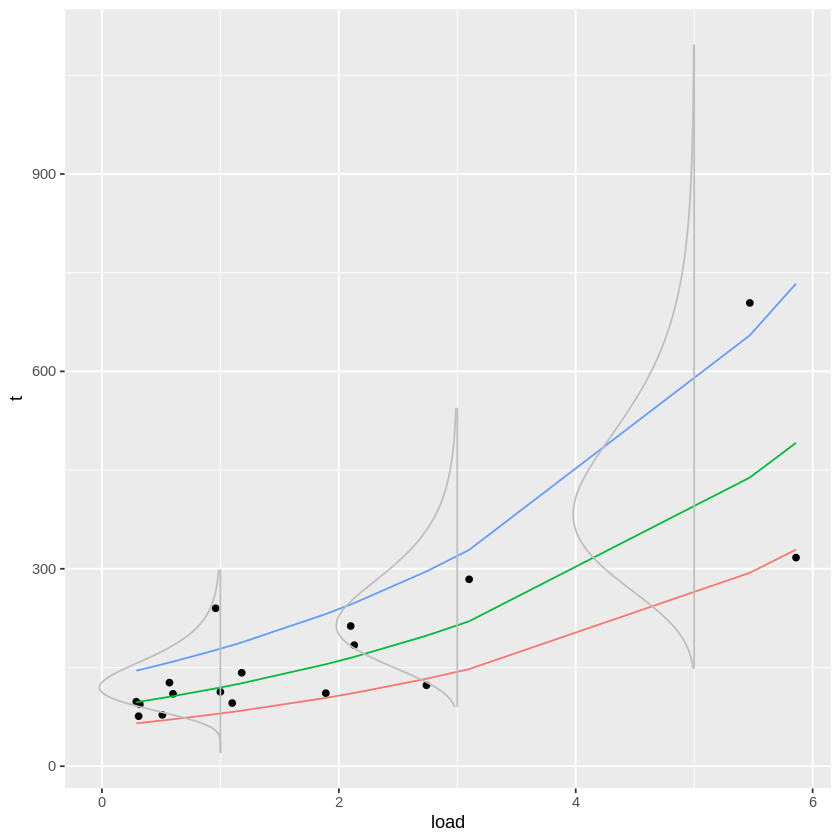

In [11]:
y50 = exp(theta[1]+theta[2]*d$load + theta[3]*qnorm(0.5))
y90 = exp(theta[1]+theta[2]*d$load + theta[3]*qnorm(0.9))
y10 = exp(theta[1]+theta[2]*d$load + theta[3]*qnorm(0.1))
dd = rbind(data.frame(prob="10%", x=d$load, y=y10),
data.frame(prob="50%", x=d$load, y=y50),
data.frame(prob="90%", x=d$load, y=y90))
library(tidyverse)
# if(require(directlabels)) install.packages("directlabels")
# library(directlabels)
p1 = d %>% ggplot(aes(load, t)) + geom_point() +
  geom_line(data=dd, aes(x, y, col=prob)) +
    #geom_dl(data=dd, aes(x, y, col=prob, label=prob),method="angled.boxes")+
  theme(legend.position = "none")
x1 = c(seq(3, 5.7, len=100))
y1 = dnorm(x1, theta[1]+theta[2]*1, theta[3])
x2 = c(seq(4.5, 6.3, len=100))
y2 = dnorm(x2, theta[1]+theta[2]*3, theta[3])
x3 = c(seq(5, 7, len=100))
y3 = dnorm(x3, theta[1]+theta[2]*5, theta[3])
ddd = rbind(data.frame(load = 1, x=(1-y1*.8),y=exp(x1)),
data.frame(load = 3, x=(3-y2*.8),y=exp(x2)),
data.frame(load = 5, x=(5-y3*.8),y=exp(x3)))
p1 + geom_path(data=ddd, aes(x, y, group=load), col="gray")+
geom_path(data=ddd, aes(load, y, group=load), col="gray")